In [2]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import BertTokenizer, TFBertModel

# Create output directory for embeddings
output_dir = "paper3b_TL_/NNs"
os.makedirs(output_dir, exist_ok=True)

# Load dataset
data = pd.read_csv('001_2802_merged_12000.csv')

# Data preprocessing
X = data['text']
y = data['label']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load pre-trained BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

# Tokenize and encode sequences using BERT tokenizer
def tokenize_and_encode(texts, max_len=64):
    inputs = tokenizer(
        texts.tolist(),
        max_length=max_len,
        padding='max_length',
        truncation=True,
        return_tensors='tf'
    )
    return inputs

# Generate BERT embeddings
def generate_embeddings(bert_model, encoded_inputs):
    outputs = bert_model(encoded_inputs['input_ids'], attention_mask=encoded_inputs['attention_mask'])
    return outputs.last_hidden_state

# Re-encode the training and test sets
X_train_encoded = tokenize_and_encode(X_train, max_len=64)
X_test_encoded = tokenize_and_encode(X_test, max_len=64)

# Generate embeddings for the training and test sets
X_train_emb = generate_embeddings(bert_model, X_train_encoded)
X_test_emb = generate_embeddings(bert_model, X_test_encoded)

# Save embeddings to disk
np.save(os.path.join(output_dir, 'BERT_X_train_emb.npy'), X_train_emb)
np.save(os.path.join(output_dir, 'BERT_X_test_emb.npy'), X_test_emb)
np.save(os.path.join(output_dir, 'BERT_y_train.npy'), y_train)
np.save(os.path.join(output_dir, 'BERT_y_test.npy'), y_test)

print("BERT embeddings saved to disk.")


C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

BERT embeddings saved to disk.


In [8]:
import os
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from transformers import T5Tokenizer, TFT5EncoderModel

# Create output directory for embeddings
output_dir = "paper3b_TL_/NNs"
os.makedirs(output_dir, exist_ok=True)

# Load dataset
data = pd.read_csv('001_2802_merged_12000.csv')

# Data preprocessing
X = data['text']
y = data['label']

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Load pre-trained T5 tokenizer and model (using the encoder-only version)
tokenizer = T5Tokenizer.from_pretrained('t5-base')
t5_encoder_model = TFT5EncoderModel.from_pretrained('t5-base')

# Tokenize and encode sequences using T5 tokenizer
def tokenize_and_encode(texts, max_len=64):
    inputs = tokenizer(
        texts.tolist(),
        max_length=max_len,
        padding='max_length',
        truncation=True,
        return_tensors='tf'
    )
    return inputs

# Generate T5 encoder embeddings (no decoder needed)
def generate_embeddings(t5_encoder_model, encoded_inputs):
    outputs = t5_encoder_model(input_ids=encoded_inputs['input_ids'], attention_mask=encoded_inputs['attention_mask'])
    return outputs.last_hidden_state

# Re-encode the training and test sets
X_train_encoded = tokenize_and_encode(X_train, max_len=64)
X_test_encoded = tokenize_and_encode(X_test, max_len=64)

# Generate embeddings for the training and test sets using the encoder
X_train_emb = generate_embeddings(t5_encoder_model, X_train_encoded)
X_test_emb = generate_embeddings(t5_encoder_model, X_test_encoded)

# Save embeddings to disk
np.save(os.path.join(output_dir, 'T5_X_train_emb.npy'), X_train_emb)
np.save(os.path.join(output_dir, 'T5_X_test_emb.npy'), X_test_emb)
np.save(os.path.join(output_dir, 'T5_y_train.npy'), y_train)
np.save(os.path.join(output_dir, 'T5_y_test.npy'), y_test)

print("T5 embeddings saved to disk.")


C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFT5EncoderModel: ['decoder.block.9.layer.0.SelfAttention.o.weight', 'decoder.block.6.layer.0.SelfAttention.k.weight', 'decoder.block.7.layer.1.EncDecAttention.k.weight', 'decoder.block.10.layer.0.SelfAttention.v.weight', 'decoder.block.8.layer.1.layer_norm.weight', 'decoder.block.10.layer.2.DenseReluDense.wo.weight', 'decoder.block.9.layer.1.EncDecAttention.v.weight', 'decoder.block.1.layer.1.EncDecAttention.o.weight', 'decoder.block.7.layer.2.DenseReluDense.wo.weight', 'decoder.block.1.laye

T5 embeddings saved to disk.


In [13]:
from transformers import TFT5EncoderModel

model = TFT5EncoderModel.from_pretrained("t5-base")
import tensorflow as tf

model_size = sum(tf.size(variable).numpy() for variable in model.trainable_variables)
print(f"T5-base EncoderModel size: {model_size / 1e6:.2f} million parameters")



Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFT5EncoderModel: ['decoder.block.3.layer.1.layer_norm.weight', 'decoder.block.3.layer.0.layer_norm.weight', 'decoder.block.10.layer.2.DenseReluDense.wi.weight', 'decoder.block.0.layer.1.EncDecAttention.k.weight', 'decoder.block.11.layer.2.layer_norm.weight', 'decoder.block.5.layer.1.layer_norm.weight', 'decoder.block.2.layer.1.EncDecAttention.v.weight', 'decoder.block.3.layer.0.SelfAttention.v.weight', 'decoder.block.1.layer.2.DenseReluDense.wi.weight', 'decoder.block.9.layer.2.DenseReluDense.wo.weight', 'decoder.block.6.layer.2.DenseReluDense.wi.weight', 'decoder.block.9.layer.1.EncDecAttention.k.weight', 'decoder.block.0.layer.0.SelfAttention.relative_attention_bias.weight', 'decoder.block.7.layer.0.SelfAttention.k.weight', 'decoder.block.7.layer.2.layer_norm.weight', 'decoder.block.4.layer.0.SelfAttention.k.weight', 'decoder.block.8.layer.1.EncDecAttention.q.weight', 'decoder.block.11.layer.0.SelfAtt

T5-base EncoderModel size: 109.63 million parameters


In [ ]:
#Test last hidden state
import time
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, GlobalMaxPooling1D, Flatten
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report
# Set output directory for results
output_dir = "paper3b_TL_Proposed"
os.makedirs(output_dir, exist_ok=True)

N_test = "Test4_Ensamble_and_BERT_T5_1DCNN_Dense"

# Load the saved embeddings
bert_X_train_emb = np.load(os.path.join(output_dir, 'BERT_X_train_emb.npy'))
bert_X_test_emb = np.load(os.path.join(output_dir, 'BERT_X_test_emb.npy'))
t5_X_train_emb = np.load(os.path.join(output_dir, 'T5_X_train_emb.npy'))
t5_X_test_emb = np.load(os.path.join(output_dir, 'T5_X_test_emb.npy'))
y_train = np.load(os.path.join(output_dir, 'BERT_y_train.npy'))  # Labels are the same for both BERT and T5
y_test = np.load(os.path.join(output_dir, 'BERT_y_test.npy'))

# Ensure labels are in the right shape
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# Define 1D CNN model for both BERT and T5 embeddings
def create_cnn_model(input_shape):
    model = Sequential([
        Conv1D(128, 5, activation='relu', input_shape=input_shape),
        GlobalMaxPooling1D(),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid', dtype='float32')  # Binary classification
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Define Dense model for both BERT and T5 embeddings
def create_dense_model(input_shape):
    model = Sequential([
        Flatten(),  # Flatten the input to ensure proper input shape for Dense layers
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid', dtype='float32')  # Binary classification
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Initialize a DataFrame to store results
csv_file_path = os.path.join(output_dir, N_test + '_Ablation_BERT_T5_.csv')
columns = ['model', 'accuracy', 'precision', 'recall', 'F1', 'AUC', 'training time', 'model size']
results_df = pd.DataFrame(columns=columns)

# Function to evaluate and log model metrics
def evaluate_model_with_report(model_name, model, X_test_emb, y_test, training_time):
    # Predict probabilities
    pred_proba = model.predict(X_test_emb)
    pred = (pred_proba > 0.5).astype(int)

    # Calculate metrics
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred_proba)
    
    # Get model size
    model_size = model.count_params()

    # Save metrics to the results dataframe
    results_df.loc[len(results_df)] = [model_name, accuracy, precision, recall, f1, auc, training_time, model_size]

    # Print classification report
    print(f"Classification Report for {model_name}:\n")
    print(classification_report(y_test, pred, digits=3))

    return pred, pred_proba

# Train and evaluate the BERT + 1D CNN model
print("Training BERT + 1DCNN Model...")
start_time = time.time()
bert_cnn_model = create_cnn_model(bert_X_train_emb.shape[1:])
bert_cnn_model.fit(bert_X_train_emb, y_train, batch_size=16, epochs=10, validation_data=(bert_X_test_emb, y_test), verbose=2)
bert_training_time = time.time() - start_time
bert_pred, bert_pred_proba = evaluate_model_with_report('BERT + 1DCNN', bert_cnn_model, bert_X_test_emb, y_test, bert_training_time)

# Train and evaluate the T5 + 1D CNN model
print("Training T5 + 1DCNN Model...")
start_time = time.time()
t5_cnn_model = create_cnn_model(t5_X_train_emb.shape[1:])
t5_cnn_model.fit(t5_X_train_emb, y_train, batch_size=16, epochs=10, validation_data=(t5_X_test_emb, y_test), verbose=2)
t5_training_time = time.time() - start_time
t5_pred, t5_pred_proba = evaluate_model_with_report('T5 + 1DCNN', t5_cnn_model, t5_X_test_emb, y_test, t5_training_time)

# Train and evaluate the BERT + Dense model
print("Training BERT + Dense Model...")
start_time = time.time()
bert_dense_model = create_dense_model(bert_X_train_emb.shape[1:])
bert_dense_model.fit(bert_X_train_emb, y_train, batch_size=16, epochs=10, validation_data=(bert_X_test_emb, y_test), verbose=2)
bert_dense_training_time = time.time() - start_time
bert_dense_pred, bert_dense_pred_proba = evaluate_model_with_report('BERT + Dense', bert_dense_model, bert_X_test_emb, y_test, bert_dense_training_time)

# Train and evaluate the T5 + Dense model
print("Training T5 + Dense Model...")
start_time = time.time()
t5_dense_model = create_dense_model(t5_X_train_emb.shape[1:])
t5_dense_model.fit(t5_X_train_emb, y_train, batch_size=16, epochs=10, validation_data=(t5_X_test_emb, y_test), verbose=2)
t5_dense_training_time = time.time() - start_time
t5_dense_pred, t5_dense_pred_proba = evaluate_model_with_report('T5 + Dense', t5_dense_model, t5_X_test_emb, y_test, t5_dense_training_time)

# Perform logical AND: only predict 1 if all models predict 1
final_pred = np.logical_and(np.logical_and(bert_pred, t5_pred), np.logical_and(bert_dense_pred, t5_dense_pred)).astype(int)

# Calculate and log metrics for logical AND voting
accuracy = accuracy_score(y_test, final_pred)
precision = precision_score(y_test, final_pred)
recall = recall_score(y_test, final_pred)
f1 = f1_score(y_test, final_pred)
auc = roc_auc_score(y_test, np.maximum(bert_pred_proba, t5_pred_proba))  # Use max probabilities for AUC calculation

# Print classification report for logical AND voting
print(f"Classification Report for Logical AND Voting:\n")
print(classification_report(y_test, final_pred, digits=3))

# Add logical AND voting results to the DataFrame
results_df.loc[len(results_df)] = ['Logical AND Voting', accuracy, precision, recall, f1, auc, 'N/A', 'N/A']

# Save the results to CSV
results_df.to_csv(csv_file_path, index=False)

# Confusion matrix for logical AND voting
conf_matrix = confusion_matrix(y_test, final_pred)

# Plot confusion matrix with updated settings to show all numbers
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='g', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix - Logical AND Voting')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.savefig(os.path.join(output_dir, 'confusion_matrix_logical_and_updated.png'))
plt.show()

# ROC curves for BERT + 1DCNN, T5 + 1DCNN, BERT + Dense, and T5 + Dense models
fpr_bert_cnn, tpr_bert_cnn, _ = roc_curve(y_test, bert_pred_proba)
fpr_t5_cnn, tpr_t5_cnn, _ = roc_curve(y_test, t5_pred_proba)
fpr_bert_dense, tpr_bert_dense, _ = roc_curve(y_test, bert_dense_pred_proba)
fpr_t5_dense, tpr_t5_dense, _ = roc_curve(y_test, t5_dense_pred_proba)
fpr_and, tpr_and, _ = roc_curve(y_test, np.maximum(bert_pred_proba, t5_pred_proba))

plt.figure(figsize=(8, 6))
plt.plot(fpr_bert_cnn, tpr_bert_cnn, label=f'BERT + 1DCNN (AUC = {roc_auc_score(y_test, bert_pred_proba):.3f})', color='blue')
plt.plot(fpr_t5_cnn, tpr_t5_cnn, label=f'T5 + 1DCNN (AUC = {roc_auc_score(y_test, t5_pred_proba):.3f})', color='green')
plt.plot(fpr_bert_dense, tpr_bert_dense, label=f'BERT + Dense (AUC = {roc_auc_score(y_test, bert_dense_pred_proba):.3f})', color='orange')
plt.plot(fpr_t5_dense, tpr_t5_dense, label=f'T5 + Dense (AUC = {roc_auc_score(y_test, t5_dense_pred_proba):.3f})', color='purple')
plt.plot(fpr_and, tpr_and, label=f'Logical AND Voting (AUC = {auc:.3f})', color='red')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best', fontsize=12)
plt.savefig(os.path.join(output_dir, 'roc_curve_comparison_logical_and.png'))
plt.show()

# Print out the final results
print(f"Final Model Metrics saved to {csv_file_path}")
print(results_df)


In [4]:
from transformers import BertTokenizer, TFBertModel
import tensorflow as tf

# Load BERT tokenizer and model
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
bert_model = TFBertModel.from_pretrained('bert-base-uncased')

# The sentence we want to process
sentence = "I don't even care about it."

# Tokenize the sentence
encoded_input = tokenizer(sentence, return_tensors='tf', padding=True, truncation=True, max_length=64)

# Get the last hidden state from BERT
with tf.GradientTape():  # Gradient tape isn't necessary here, but it's good practice when working with models
    outputs = bert_model(encoded_input)
    last_hidden_state = outputs.last_hidden_state

# Print the shape and the actual last hidden state
print(f"Shape of BERT's last hidden state: {last_hidden_state.shape}")
print("BERT's last hidden state (tensor):")
print(last_hidden_state)


C:\Users\Administrator\AppData\Roaming\Python\Python311\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertModel: ['cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight']
- This IS expected if you are initializing TFBertModel from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions w

Shape of BERT's last hidden state: (1, 11, 768)
BERT's last hidden state (tensor):
tf.Tensor(
[[[ 0.27428818  0.30068988 -0.07088782 ...  0.03893937  0.24938497
    0.4268863 ]
  [ 0.24355634  0.50623316 -0.40862328 ... -0.01199495  0.66637295
    0.19672453]
  [ 0.4255079   0.6322825  -0.11940998 ...  0.05673246  0.06560767
   -0.39831832]
  ...
  [ 0.48013887 -0.3823627   0.36676478 ...  0.3880859   0.29748413
    0.5582643 ]
  [ 0.7099708   0.21881406 -0.28667092 ...  0.06589456 -0.4205484
   -0.5049169 ]
  [-0.15416582  0.48682386  0.21136206 ...  0.19347242 -0.2373536
    0.05779475]]], shape=(1, 11, 768), dtype=float32)


In [8]:
from transformers import T5Tokenizer, TFT5EncoderModel
import tensorflow as tf

# Initialize T5 tokenizer and encoder-only model
tokenizer = T5Tokenizer.from_pretrained('t5-base')
model = TFT5EncoderModel.from_pretrained('t5-base')

# The sentence to process
sentence = "I don't even care about it."

# Tokenize the sentence
encoded_input = tokenizer(sentence, return_tensors='tf')

# Get the last hidden state from the T5 encoder
outputs = model(input_ids=encoded_input['input_ids'], attention_mask=encoded_input['attention_mask'])
last_hidden_state = outputs.last_hidden_state

# Print the shape and the last hidden state
print(f"Shape of T5's last hidden state: {last_hidden_state.shape}")
print("T5's last hidden state (tensor):")
print(last_hidden_state)


Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFT5EncoderModel: ['decoder.block.9.layer.2.layer_norm.weight', 'decoder.block.3.layer.2.DenseReluDense.wo.weight', 'decoder.block.4.layer.2.layer_norm.weight', 'decoder.block.10.layer.1.EncDecAttention.k.weight', 'decoder.block.9.layer.1.EncDecAttention.v.weight', 'decoder.block.0.layer.1.layer_norm.weight', 'decoder.block.9.layer.1.EncDecAttention.o.weight', 'decoder.block.6.layer.0.SelfAttention.k.weight', 'decoder.block.9.layer.0.SelfAttention.q.weight', 'decoder.block.3.layer.0.layer_norm.weight', 'decoder.block.11.layer.1.EncDecAttention.v.weight', 'decoder.block.0.layer.1.EncDecAttention.k.weight', 'decoder.block.4.layer.0.layer_norm.weight', 'decoder.block.7.layer.0.SelfAttention.o.weight', 'decoder.block.0.layer.1.EncDecAttention.o.weight', 'decoder.block.6.layer.1.EncDecAttention.o.weight', 'decoder.block.6.layer.2.DenseReluDense.wi.weight', 'decoder.block.10.layer.0.SelfAttention.v.weight', 'd

Shape of T5's last hidden state: (1, 10, 768)
T5's last hidden state (tensor):
tf.Tensor(
[[[-0.17335135  0.17375167 -0.21005559 ... -0.04864601 -0.15005031
   -0.32598445]
  [ 0.01455845  0.12551819  0.01616712 ...  0.00484339 -0.09628308
   -0.17913   ]
  [-0.3120712  -0.3329482  -0.00822508 ...  0.0742058   0.03171007
   -0.09672818]
  ...
  [ 0.02563061  0.10031878 -0.4155119  ... -0.4378884   0.21979561
   -0.6398894 ]
  [-0.24923432 -0.27118692  0.07663856 ...  0.1847028   0.0496218
   -0.3056702 ]
  [-0.01117751 -0.01453312 -0.01218049 ... -0.02095298 -0.01283596
   -0.00599688]]], shape=(1, 10, 768), dtype=float32)


In [10]:
from transformers import T5Tokenizer

# Initialize T5 tokenizer
tokenizer = T5Tokenizer.from_pretrained('t5-base')

# The sentence to tokenize
sentence = "I don't even care about it."

# Tokenize the sentence
tokens = tokenizer.tokenize(sentence)

# Print the tokens
print("T5 Tokens:", tokens)


T5 Tokens: ['▁I', '▁don', "'", 't', '▁even', '▁care', '▁about', '▁it', '.']


Training BERT + 1DCNN Model...
Epoch 1/20


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


401/401 - 3s - 7ms/step - accuracy: 0.6648 - loss: 0.5997 - val_accuracy: 0.7041 - val_loss: 0.5683
Epoch 2/20
401/401 - 2s - 6ms/step - accuracy: 0.7958 - loss: 0.4579 - val_accuracy: 0.7765 - val_loss: 0.4769
Epoch 3/20
401/401 - 2s - 6ms/step - accuracy: 0.8910 - loss: 0.3200 - val_accuracy: 0.7697 - val_loss: 0.4911
Epoch 4/20
401/401 - 2s - 6ms/step - accuracy: 0.9499 - loss: 0.2050 - val_accuracy: 0.8552 - val_loss: 0.3760
Epoch 5/20
401/401 - 2s - 6ms/step - accuracy: 0.9739 - loss: 0.1275 - val_accuracy: 0.8814 - val_loss: 0.3070
Epoch 6/20
401/401 - 2s - 6ms/step - accuracy: 0.9844 - loss: 0.0831 - val_accuracy: 0.8602 - val_loss: 0.3663
Epoch 7/20
401/401 - 2s - 6ms/step - accuracy: 0.9874 - loss: 0.0635 - val_accuracy: 0.9057 - val_loss: 0.3049
Epoch 8/20
401/401 - 2s - 6ms/step - accuracy: 0.9884 - loss: 0.0584 - val_accuracy: 0.8770 - val_loss: 0.3256
Epoch 9/20
401/401 - 2s - 6ms/step - accuracy: 0.9891 - loss: 0.0515 - val_accuracy: 0.8889 - val_loss: 0.3053
Epoch 10/20


C:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


401/401 - 3s - 7ms/step - accuracy: 0.6664 - loss: 0.5987 - val_accuracy: 0.7247 - val_loss: 0.5492
Epoch 2/20
401/401 - 2s - 6ms/step - accuracy: 0.8205 - loss: 0.4426 - val_accuracy: 0.7859 - val_loss: 0.4660
Epoch 3/20
401/401 - 2s - 6ms/step - accuracy: 0.9215 - loss: 0.2786 - val_accuracy: 0.8552 - val_loss: 0.3657
Epoch 4/20
401/401 - 2s - 6ms/step - accuracy: 0.9747 - loss: 0.1443 - val_accuracy: 0.8720 - val_loss: 0.3145
Epoch 5/20
401/401 - 2s - 6ms/step - accuracy: 0.9864 - loss: 0.0801 - val_accuracy: 0.8552 - val_loss: 0.3442
Epoch 6/20
401/401 - 2s - 6ms/step - accuracy: 0.9892 - loss: 0.0546 - val_accuracy: 0.8727 - val_loss: 0.3178
Epoch 7/20
401/401 - 2s - 6ms/step - accuracy: 0.9906 - loss: 0.0466 - val_accuracy: 0.8777 - val_loss: 0.3266
Epoch 8/20
401/401 - 2s - 6ms/step - accuracy: 0.9913 - loss: 0.0414 - val_accuracy: 0.8327 - val_loss: 0.4591
Epoch 9/20
401/401 - 2s - 6ms/step - accuracy: 0.9930 - loss: 0.0359 - val_accuracy: 0.8764 - val_loss: 0.3477
Epoch 10/20


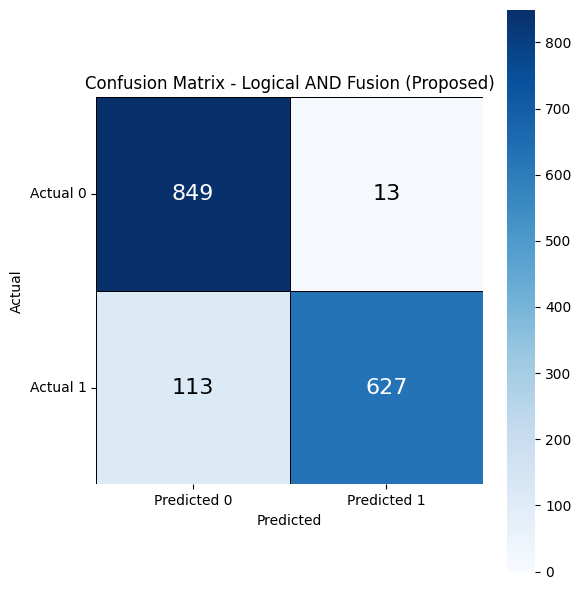

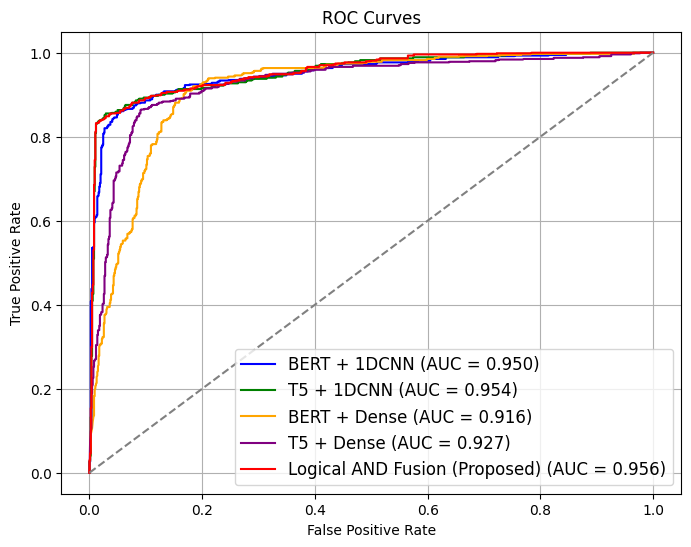

Final Model Metrics saved to paper3b_TL_Proposed\Test1_Ensamble_and_BERT_T5_1DCNN_Dense_Ablation_BERT_T5_.csv
                model  accuracy  precision    recall        F1       AUC  \
0        BERT + 1DCNN  0.903870   0.923410  0.863514  0.892458  0.949991   
1          T5 + 1DCNN  0.887640   0.864583  0.897297  0.880637  0.953877   
2        BERT + Dense  0.852684   0.783784  0.940541  0.855037  0.915827   
3          T5 + Dense  0.867041   0.833123  0.890541  0.860875  0.926921   
4  Logical AND Voting  0.921348   0.979688  0.847297  0.908696  0.955774   

  training time model size  
0     48.988574     508289  
1     48.808619     508289  
2    161.459301    6308225  
3    161.200273    6308225  
4           N/A        N/A  


In [7]:
####################################################
#Proposed. The chosen one
####################################################
#Test1_Ensamble_and_BERT_T5_1DCNN_Dense
import time
import numpy as np
import os
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, GlobalMaxPooling1D, Flatten
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.metrics import classification_report
# Set output directory for results
output_dir = "paper3b_TL_Proposed"
os.makedirs(output_dir, exist_ok=True)

N_test = "Test1_Ensamble_and_BERT_T5_1DCNN_Dense"

# Load the saved embeddings
bert_X_train_emb = np.load(os.path.join(output_dir, 'BERT_X_train_emb.npy'))
bert_X_test_emb = np.load(os.path.join(output_dir, 'BERT_X_test_emb.npy'))
t5_X_train_emb = np.load(os.path.join(output_dir, 'T5_X_train_emb.npy'))
t5_X_test_emb = np.load(os.path.join(output_dir, 'T5_X_test_emb.npy'))
y_train = np.load(os.path.join(output_dir, 'BERT_y_train.npy'))  # Labels are the same for both BERT and T5
y_test = np.load(os.path.join(output_dir, 'BERT_y_test.npy'))

# Ensure labels are in the right shape
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# Define 1D CNN model for both BERT and T5 embeddings
def create_cnn_model(input_shape):
    model = Sequential([
        Conv1D(128, 5, activation='relu', input_shape=input_shape),
        GlobalMaxPooling1D(),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid', dtype='float32')  # Binary classification
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Define Dense model for both BERT and T5 embeddings
def create_dense_model(input_shape):
    model = Sequential([
        Flatten(),  # Flatten the input to ensure proper input shape for Dense layers
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(1, activation='sigmoid', dtype='float32')  # Binary classification
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

# Initialize a DataFrame to store results
csv_file_path = os.path.join(output_dir, N_test + '_Ablation_BERT_T5_.csv')
columns = ['model', 'accuracy', 'precision', 'recall', 'F1', 'AUC', 'training time', 'model size']
results_df = pd.DataFrame(columns=columns)

# Function to evaluate and log model metrics
def evaluate_model_with_report(model_name, model, X_test_emb, y_test, training_time):
    # Predict probabilities
    pred_proba = model.predict(X_test_emb)
    pred = (pred_proba > 0.5).astype(int)

    # Calculate metrics
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred_proba)
    
    # Get model size
    model_size = model.count_params()

    # Save metrics to the results dataframe
    results_df.loc[len(results_df)] = [model_name, accuracy, precision, recall, f1, auc, training_time, model_size]

    # Print classification report
    print(f"Classification Report for {model_name}:\n")
    print(classification_report(y_test, pred, digits=3))

    return pred, pred_proba

# Train and evaluate the BERT + 1D CNN model
print("Training BERT + 1DCNN Model...")
start_time = time.time()
bert_cnn_model = create_cnn_model(bert_X_train_emb.shape[1:])
bert_cnn_model.fit(bert_X_train_emb, y_train, batch_size=16, epochs=20, validation_data=(bert_X_test_emb, y_test), verbose=2)
bert_training_time = time.time() - start_time
bert_pred, bert_pred_proba = evaluate_model_with_report('BERT + 1DCNN', bert_cnn_model, bert_X_test_emb, y_test, bert_training_time)

# Train and evaluate the T5 + 1D CNN model
print("Training T5 + 1DCNN Model...")
start_time = time.time()
t5_cnn_model = create_cnn_model(t5_X_train_emb.shape[1:])
t5_cnn_model.fit(t5_X_train_emb, y_train, batch_size=16, epochs=20, validation_data=(t5_X_test_emb, y_test), verbose=2)
t5_training_time = time.time() - start_time
t5_pred, t5_pred_proba = evaluate_model_with_report('T5 + 1DCNN', t5_cnn_model, t5_X_test_emb, y_test, t5_training_time)

# Train and evaluate the BERT + Dense model
print("Training BERT + Dense Model...")
start_time = time.time()
bert_dense_model = create_dense_model(bert_X_train_emb.shape[1:])
bert_dense_model.fit(bert_X_train_emb, y_train, batch_size=16, epochs=20, validation_data=(bert_X_test_emb, y_test), verbose=2)
bert_dense_training_time = time.time() - start_time
bert_dense_pred, bert_dense_pred_proba = evaluate_model_with_report('BERT + Dense', bert_dense_model, bert_X_test_emb, y_test, bert_dense_training_time)

# Train and evaluate the T5 + Dense model
print("Training T5 + Dense Model...")
start_time = time.time()
t5_dense_model = create_dense_model(t5_X_train_emb.shape[1:])
t5_dense_model.fit(t5_X_train_emb, y_train, batch_size=16, epochs=20, validation_data=(t5_X_test_emb, y_test), verbose=2)
t5_dense_training_time = time.time() - start_time
t5_dense_pred, t5_dense_pred_proba = evaluate_model_with_report('T5 + Dense', t5_dense_model, t5_X_test_emb, y_test, t5_dense_training_time)

# Perform logical AND: only predict 1 if all models predict 1
final_pred = np.logical_and(np.logical_and(bert_pred, t5_pred), np.logical_and(bert_dense_pred, t5_dense_pred)).astype(int)

# Calculate and log metrics for logical AND voting
accuracy = accuracy_score(y_test, final_pred)
precision = precision_score(y_test, final_pred)
recall = recall_score(y_test, final_pred)
f1 = f1_score(y_test, final_pred)
auc = roc_auc_score(y_test, np.maximum(bert_pred_proba, t5_pred_proba))  # Use max probabilities for AUC calculation

# Print classification report for logical AND voting
print(f"Classification Report for Logical AND Voting:\n")
print(classification_report(y_test, final_pred, digits=3))

# Add logical AND voting results to the DataFrame
results_df.loc[len(results_df)] = ['Logical AND Voting', accuracy, precision, recall, f1, auc, 'N/A', 'N/A']

# Save the results to CSV
results_df.to_csv(csv_file_path, index=False)


#  function to plot confusion matrix with single annotations
def plot_confusion_matrix(conf_matrix):
    plt.figure(figsize=(6, 6))
    ax = sns.heatmap(conf_matrix, annot=False, fmt='d', cmap='Blues',  # Set annot=False to prevent duplicate text
                     xticklabels=['Predicted 0', 'Predicted 1'],
                     yticklabels=['Actual 0', 'Actual 1'],
                     cbar=True, square=True, linewidths=0.5, linecolor='black',
                     vmin=0, vmax=conf_matrix.max())
    
    # Loop over data dimensions and create text annotations with color adjustment
    for i in range(conf_matrix.shape[0]):
        for j in range(conf_matrix.shape[1]):
            color = 'white' if conf_matrix[i, j] > conf_matrix.max() / 2 else 'black'
            ax.text(j + 0.5, i + 0.5, conf_matrix[i, j], ha="center", va="center",
                    color=color, fontsize=16)
    
    plt.title('Confusion Matrix - Logical AND Fusion (Proposed)')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.xticks(rotation=0)
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.savefig(os.path.join(output_dir, 'confusion_matrix_logical_and_final_no_duplicates.png'))
    plt.show()


# Compute confusion matrix for the logical AND voting predictions
conf_matrix = confusion_matrix(y_test, final_pred)


plot_confusion_matrix(conf_matrix)


# ROC curves for BERT + 1DCNN, T5 + 1DCNN, BERT + Dense, and T5 + Dense models
fpr_bert_cnn, tpr_bert_cnn, _ = roc_curve(y_test, bert_pred_proba)
fpr_t5_cnn, tpr_t5_cnn, _ = roc_curve(y_test, t5_pred_proba)
fpr_bert_dense, tpr_bert_dense, _ = roc_curve(y_test, bert_dense_pred_proba)
fpr_t5_dense, tpr_t5_dense, _ = roc_curve(y_test, t5_dense_pred_proba)
fpr_and, tpr_and, _ = roc_curve(y_test, np.maximum(bert_pred_proba, t5_pred_proba))

plt.figure(figsize=(8, 6))
plt.plot(fpr_bert_cnn, tpr_bert_cnn, label=f'BERT + 1DCNN (AUC = {roc_auc_score(y_test, bert_pred_proba):.3f})', color='blue')
plt.plot(fpr_t5_cnn, tpr_t5_cnn, label=f'T5 + 1DCNN (AUC = {roc_auc_score(y_test, t5_pred_proba):.3f})', color='green')
plt.plot(fpr_bert_dense, tpr_bert_dense, label=f'BERT + Dense (AUC = {roc_auc_score(y_test, bert_dense_pred_proba):.3f})', color='orange')
plt.plot(fpr_t5_dense, tpr_t5_dense, label=f'T5 + Dense (AUC = {roc_auc_score(y_test, t5_dense_pred_proba):.3f})', color='purple')
plt.plot(fpr_and, tpr_and, label=f'Logical AND Fusion (Proposed) (AUC = {auc:.3f})', color='red')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best', fontsize=12)
plt.grid(True)
plt.savefig(os.path.join(output_dir, 'roc_curve_comparison_logical_and.png'))
plt.show()

# Print out the final results
print(f"Final Model Metrics saved to {csv_file_path}")
print(results_df)
